In [6]:
using Random
using Distributions

Random.seed!(42)
#Generate Data
x_min = -10 # xrange to plot
x_max = 10
μ_min = -5
μ_max = 5

dist = (μ, σ) -> Normal(μ, σ)
# make the set of distributions we're going to plot:
dists = [dist(-6+i, 1+0.3*i) for i in 1:10]
# creates random scatter points:
rnd = rand.(Truncated.(dists, x_min, x_max), 20)
# get the pdf of the dists:
dat_pdf = [(x) -> pdf.(d, x) for d in dists]

# point density for pdfs
x_pnts = collect(x_min:0.05:x_max)

# add redundant points at the ends, for nicer fill:
x_pnts_ext = [[x_pnts[1]]; x_pnts; [x_pnts[end]]]

# define the Axis to which we will push! the contents of the plot
axis = @pgf Axis(
    {
        width = raw"1\textwidth",
        height = raw"0.6\textwidth",
        grid = "both",
        xmax = x_max,
        xmin = x_min,
        zmin = 0,
        "axis background/.style" = { fill = "gray!10" }, # add some beauty
        # this is needed to make the scatter points appear behind the graphs:
        set_layers,
        view = "{49}{25}",   # viewpoint
        ytick = collect(0:9),
        ztick = collect(0:0.1:1)
    },
)

# draw a yellow area at the bottom of the plot, centered at μ and 2σ wide.
@pgf area = Plot3(
    {
        no_marks,
        style ="{dashed}",
        color = "black",
        fill = "yellow!60",
        fill_opacity = 0.65,
        # so we can see the grid lines through the colored area:
        on_layer = "axis background"
    },
    Table(x = [dists[1  ].μ - dists[1  ].σ, dists[end].μ - dists[end].σ,
               dists[end].μ + dists[end].σ, dists[1  ].μ + dists[1  ].σ],
          y = [length(rnd) - 1, 0, 0, length(rnd) - 1],
          z = [0, 0, 0, 0]
         ),
    raw"\closedcycle"
)
push!(axis, area)

# add the slices as individual plots to the common axis
@pgf for i in eachindex(dists)
    scatter = Plot3(
        {
            only_marks,
            color = "red!80",
            mark_options = {scale=0.4},
            # set the markers on the same layer as the plot:
            mark_layer = "like plot",
            on_layer = "axis background"
        },
        Table(x = rnd[i],
              y = (length(dists) - i) * ones(length(rnd[i])),
              z = zeros(length(rnd[i])))
    )
    push!(axis, scatter)

    # add a pdf-curve on top of each second data set
    if i%2 == 1
        curve = Plot3(
            {
                no_marks,
                style = {thick},
                color = "blue"
            },
            Table(x = x_pnts,
                  y = (length(dists) - i) * ones(length(x_pnts)),
                  z = dat_pdf[i](x_pnts))
        )

        # The fill is drawn seperately to handle the the end of the curves nicely.
        # This is an alternative to "\fillbetween"
        fill = Plot3(
            {
                draw = "none",
                fill = "blue",
                fill_opacity = 0.25
            },
            Table(x = x_pnts_ext,
                  y = (length(dists) - i) * ones(length(x_pnts_ext)),
                  z = [[0]; dat_pdf[i](x_pnts); [0]])
        )
        push!(axis, curve, fill)
    end
end

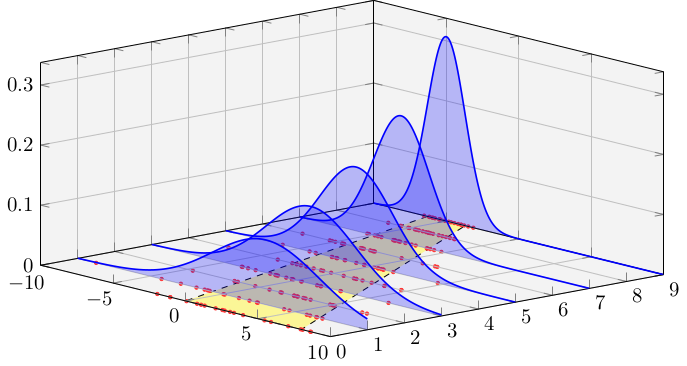

In [7]:
axis